# Trabalho Técnicas de graph mining
## Vitor Barbosa Gallucci

Olá professor, abaixo segue o código em python, seguido das tarefas pedidas em uma célula de markdown

Temporada 1: Grau Médio = 8.71, Densidade = 0.07, Transitividade = 0.38
Temporada 8: Grau Médio = 14.95, Densidade = 0.20, Transitividade = 0.64


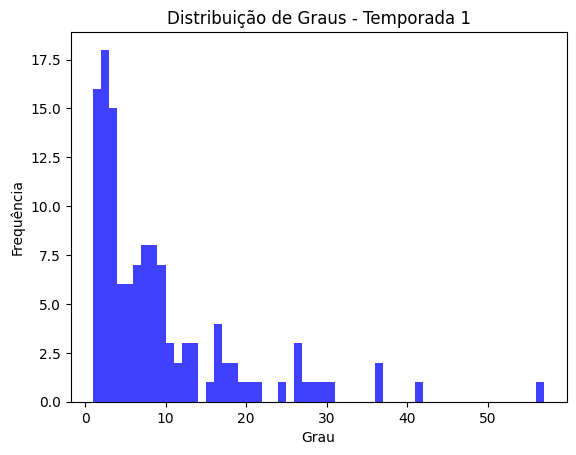

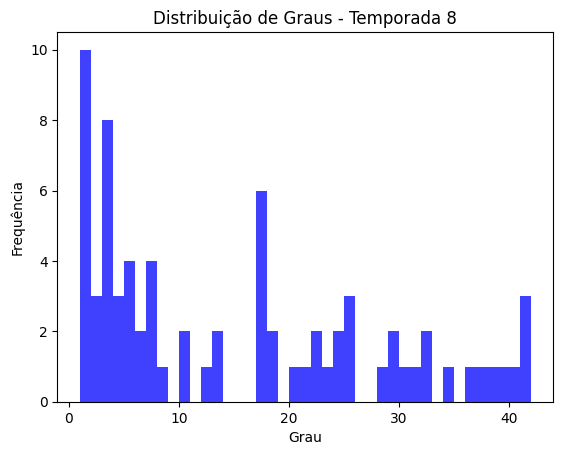

Temporada 1:
Grau: [('NED', 0.456), ('TYRION', 0.328), ('ROBERT', 0.28800000000000003)]
Intermediação: [('NED', 0.3032802081478768), ('TYRION', 0.16302743524270866), ('CATELYN', 0.11828405295282027)]
Proximidade: [('NED', 0.628140703517588), ('ROBERT', 0.5530973451327433), ('CATELYN', 0.5506607929515418)]
Autovetor: [('NED', 0.3150820196903642), ('ROBERT', 0.24818996690338857), ('CERSEI', 0.23926199958075808)]

Temporada 8:
Grau: [('SAM', 0.5753424657534246), ('DAENERYS', 0.5616438356164384), ('TYRION', 0.5616438356164384)]
Intermediação: [('DAENERYS', 0.13390159981644), ('SAM', 0.09913291196077363), ('ARYA', 0.09902087596468986)]
Proximidade: [('SAM', 0.6770077894171367), ('DAENERYS', 0.670434898257747), ('TYRION', 0.670434898257747)]
Autovetor: [('TYRION', 0.21789621436284157), ('SAM', 0.21715160565017616), ('SANSA', 0.21581251261754122)]

Comparação de personagens centrais nas duas temporadas:

Comparando Grau:
Personagens centrais em ambas as temporadas (na métrica de Grau): TYRION

C:\Users\vitor\AppData\Local\Temp\ipykernel_11060\1652721817.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  paleta_comunidades = plt.cm.get_cmap('tab10', num_cores_comunidades)
c:\Users\vitor\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


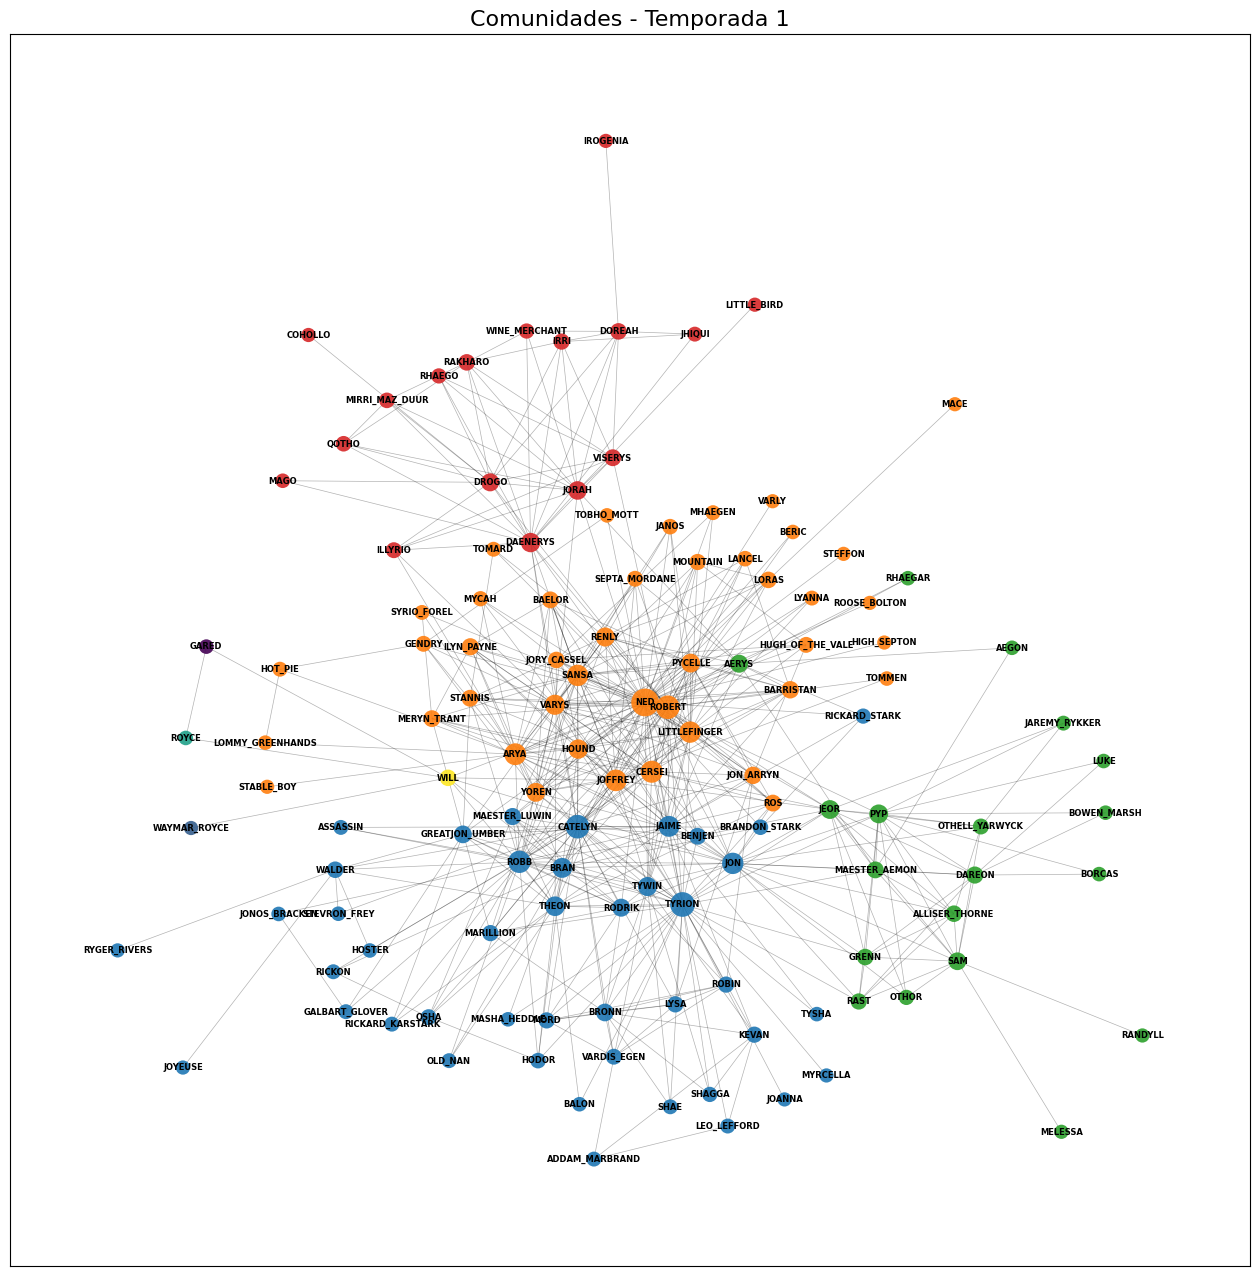

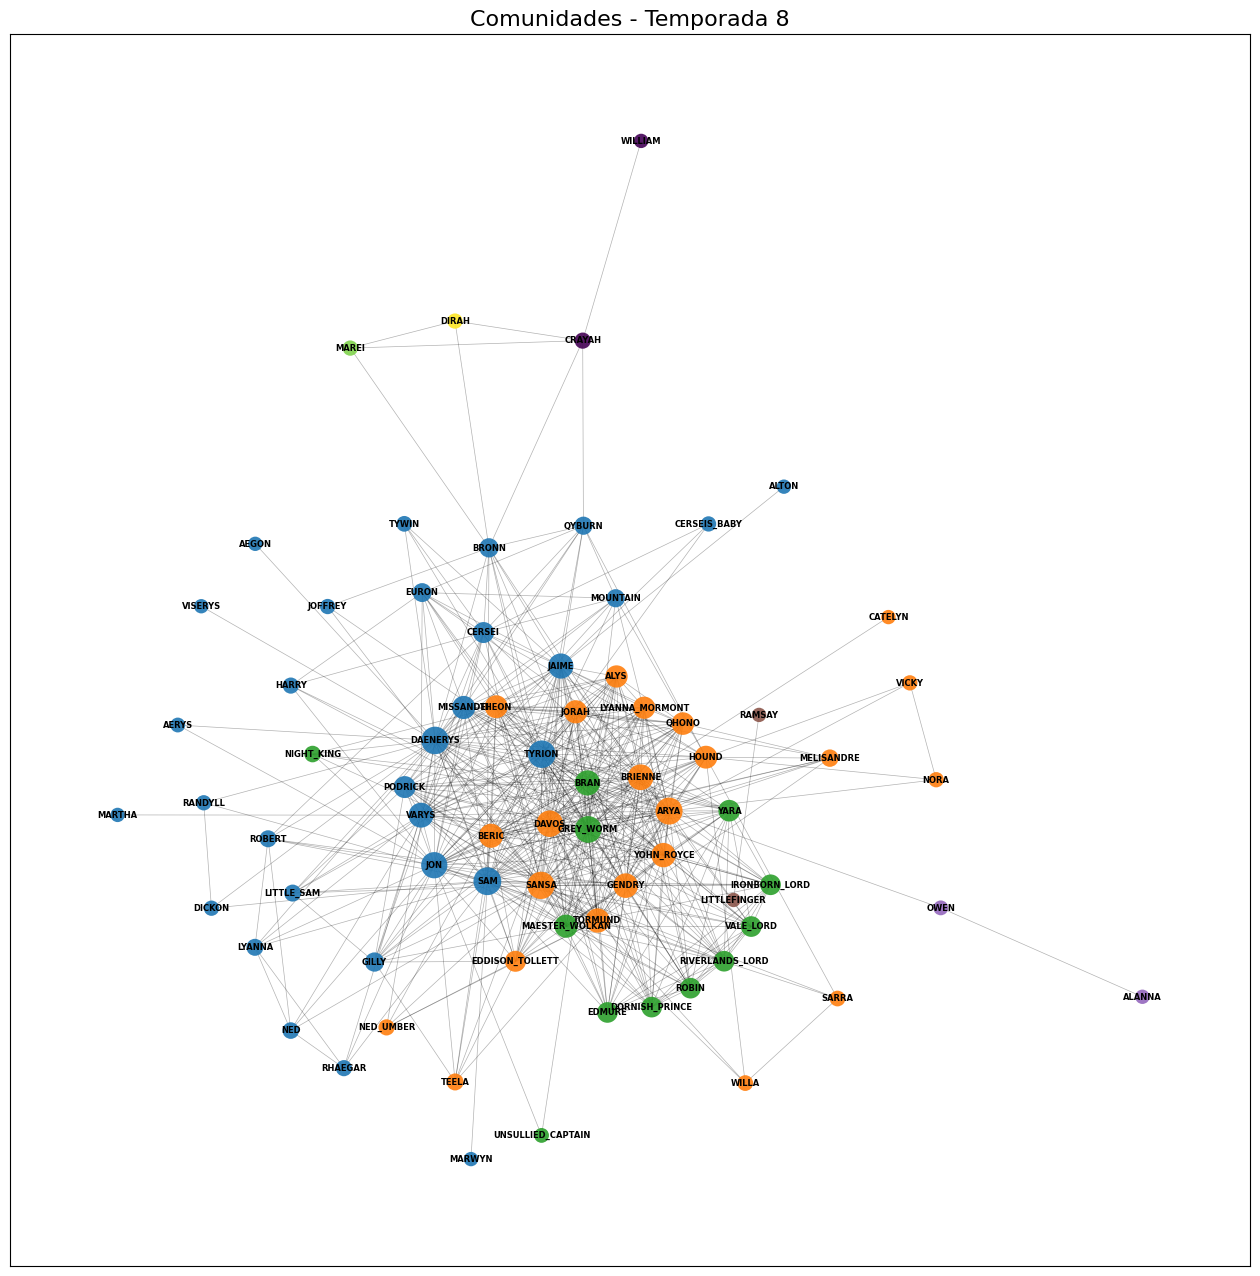

In [1]:
# Importar bibliotecas necessárias
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Carregar os dados das temporadas
S1 = pd.read_csv("got-s1-edges.csv", delimiter=",")
Grafo_Temporada1 = nx.from_pandas_edgelist(S1, source='Source', target='Target', edge_attr='Weight')

S8 = pd.read_csv("got-s8-edges.csv", delimiter=",")
Grafo_Temporada2 = nx.from_pandas_edgelist(S8, source='Source', target='Target', edge_attr='Weight')

# Função para calcular medidas de grau, densidade e transitividade
def calcular_medidas_rede(grafo):
    grau_medio = sum(dict(grafo.degree()).values()) / len(grafo)
    densidade = nx.density(grafo)
    transitividade = nx.transitivity(grafo)
    return grau_medio, densidade, transitividade

# Calcular medidas para ambas as temporadas
grau_medio_s1, densidade_s1, transitividade_s1 = calcular_medidas_rede(Grafo_Temporada1)
grau_medio_s8, densidade_s8, transitividade_s8 = calcular_medidas_rede(Grafo_Temporada2)

print("Temporada 1: Grau Médio = {:.2f}, Densidade = {:.2f}, Transitividade = {:.2f}".format(grau_medio_s1, densidade_s1, transitividade_s1))
print("Temporada 8: Grau Médio = {:.2f}, Densidade = {:.2f}, Transitividade = {:.2f}".format(grau_medio_s8, densidade_s8, transitividade_s8))

# Plotar histogramas da distribuição de graus
def plotar_histograma_graus(grafo, titulo):
    graus = [grau for nodo, grau in grafo.degree()]
    plt.hist(graus, bins=range(min(graus), max(graus) + 1), alpha=0.75, color='blue')
    plt.title(titulo)
    plt.xlabel('Grau')
    plt.ylabel('Frequência')
    plt.show()

# Exibir histogramas para as temporadas
plotar_histograma_graus(Grafo_Temporada1, "Distribuição de Graus - Temporada 1")
plotar_histograma_graus(Grafo_Temporada2, "Distribuição de Graus - Temporada 8")

# Identificar personagens mais centrais
def calcular_centralidades(grafo):
    cent_grau = nx.degree_centrality(grafo)
    cent_intermediacao = nx.betweenness_centrality(grafo)
    cent_proximidade = nx.closeness_centrality(grafo)
    cent_autovetor = nx.eigenvector_centrality(grafo)
    
    # Ordenar por centralidade e pegar os top 3
    top_3_grau = sorted(cent_grau.items(), key=lambda x: x[1], reverse=True)[:3]
    top_3_intermediacao = sorted(cent_intermediacao.items(), key=lambda x: x[1], reverse=True)[:3]
    top_3_proximidade = sorted(cent_proximidade.items(), key=lambda x: x[1], reverse=True)[:3]
    top_3_autovetor = sorted(cent_autovetor.items(), key=lambda x: x[1], reverse=True)[:3]
    
    return top_3_grau, top_3_intermediacao, top_3_proximidade, top_3_autovetor

# Calcular centralidades para as duas temporadas
centralidade_s1 = calcular_centralidades(Grafo_Temporada1)
centralidade_s8 = calcular_centralidades(Grafo_Temporada2)

print("Temporada 1:")
print("Grau:", centralidade_s1[0])
print("Intermediação:", centralidade_s1[1])
print("Proximidade:", centralidade_s1[2])
print("Autovetor:", centralidade_s1[3])

print("\nTemporada 8:")
print("Grau:", centralidade_s8[0])
print("Intermediação:", centralidade_s8[1])
print("Proximidade:", centralidade_s8[2])
print("Autovetor:", centralidade_s8[3])

# Função para comparar personagens centrais entre as temporadas
def comparar_personagens_centrais(centralidade_s1, centralidade_s8):
    categorias = ['Grau', 'Intermediação', 'Proximidade', 'Autovetor']
    
    print("\nComparação de personagens centrais nas duas temporadas:")
    for i, categoria in enumerate(categorias):
        print(f"\nComparando {categoria}:")
        
        top_s1 = {p[0] for p in centralidade_s1[i]}
        top_s8 = {p[0] for p in centralidade_s8[i]}
        
        # Verificar interseção (personagens comuns)
        comuns = top_s1.intersection(top_s8)
        
        if comuns:
            print(f"Personagens centrais em ambas as temporadas (na métrica de {categoria}): {', '.join(comuns)}")
        else:
            print(f"Não há personagens centrais em ambas as temporadas para {categoria}.")

# Comparar os personagens centrais em ambas as temporadas
comparar_personagens_centrais(centralidade_s1, centralidade_s8)

# Definir as variáveis visuais
tam_fonte = 6              # Tamanho da fonte para os rótulos dos nós
largura_arestas = 0.5      # Espessura das arestas
min_tam_nos = 100          # Tamanho mínimo dos nós
max_tam_nos = 400          # Tamanho máximo dos nós
cor_borda_nos = "black"    # Cor da borda dos nós
alpha_arestas = 0.3        # Transparência das arestas
largura_borda = 0       # Largura da borda dos nós
num_cores_comunidades = 10 # Número máximo de cores diferentes para comunidades

# Definir uma paleta de cores para as comunidades
paleta_comunidades = plt.cm.get_cmap('tab10', num_cores_comunidades)

# Função para plotar o grafo com cores de comunidades e gradiente de cor para o grau
def plotar_grafo_comunidades(grafo, comunidades, titulo):
    pos = nx.kamada_kawai_layout(grafo)  # Layout kamada kawai
    
    # Cálculo dos graus para ajustar tamanhos dos nós
    graus = dict(grafo.degree())
    max_grau = max(graus.values())
    
    # Definir tamanho dos nós baseado no grau
    tamanho_nos = {nodo: min_tam_nos + (grau / max_grau) * (max_tam_nos - min_tam_nos) for nodo, grau in graus.items()}
    
    # Plotar as comunidades com cores distintas
    plt.figure(figsize=(16, 16))
    
    for i, comunidade in enumerate(comunidades):
        cor_comunidade = paleta_comunidades(i % num_cores_comunidades)
        nx.draw_networkx_nodes(grafo, pos, nodelist=comunidade, 
                               node_color=cor_comunidade,  # Mantém a cor da comunidade
                               node_size=[tamanho_nos[n] for n in comunidade],
                               edgecolors=cor_borda_nos,  # Mantém bordas com a cor preta
                               linewidths=largura_borda, alpha=0.9)
    
    # Desenhar as arestas
    nx.draw_networkx_edges(grafo, pos, alpha=alpha_arestas, width=largura_arestas)
    
    # Adicionar rótulos aos nós
    nx.draw_networkx_labels(grafo, pos, font_size=tam_fonte, font_color="black", font_weight="bold")
    
    plt.title(titulo, size=16)
    plt.show()

# Detectar comunidades nas duas temporadas
from networkx.algorithms.community import greedy_modularity_communities
comunidades_s1 = list(greedy_modularity_communities(Grafo_Temporada1))
comunidades_s8 = list(greedy_modularity_communities(Grafo_Temporada2))

# Plotar grafos com comunidades
plotar_grafo_comunidades(Grafo_Temporada1, comunidades_s1, "Comunidades - Temporada 1")
plotar_grafo_comunidades(Grafo_Temporada2, comunidades_s8, "Comunidades - Temporada 8")


#### (Tarefa 1) Discuta quais as principais diferenças entre ambas as redes com base na distribuição de graus dos vértices (apresente os gráficos de histograma), grau médio, densidade e transitividade. Para estas três medidas, apresente os valores obtidos durante a discussão.

Temporada 1: Grau Médio = 8.71, Densidade = 0.07, Transitividade = 0.38
Temporada 8: Grau Médio = 14.95, Densidade = 0.20, Transitividade = 0.64

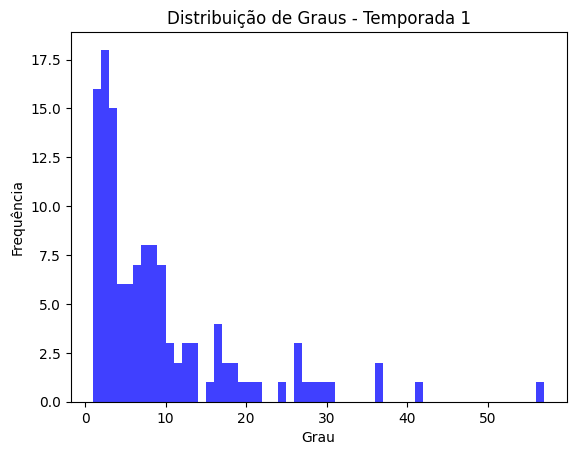
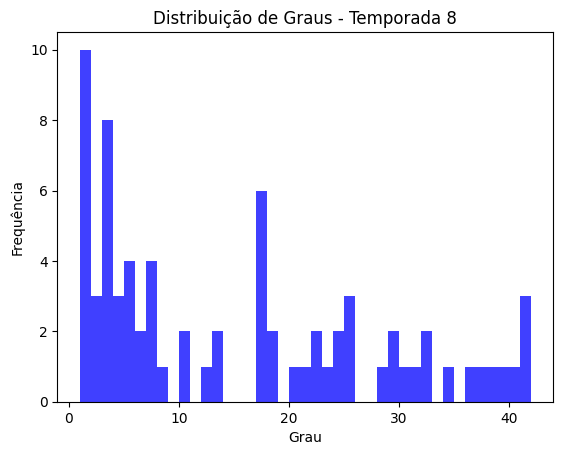

A principal diferença entre as duas temporadas nota-se no grau médio, que é maior na temporada 8. A densidade também é maior na temporada 8, o que indica que a rede está mais densa. A transitividade também é maior na temporada 8, o que indica que a rede está mais conectada. Como mostrado nos histogramas, a temporada 1 tem muito mais vértices com grau baixo, enquanto a temporada 8 tem uma distribuição maior de vértices com graus mais altos. O que mostra que mesmo com menos personagens interagindo em geral na temporada 8, os personagens que interagem, interagem bem mais entre si.

#### (Tarefa 2) Para cada uma das redes, identifique quem são os 3 personagens mais centrais de acordo com as medidas de centralidade de grau, intermediação, proximidade e autovetor. Algum destes personagens é central em ambas as temporadas?

Os 3 personagens mais centrais de acordo com as métricas pedidas e seus respectivos valores são:

Temporada 1:
Grau: 'NED', 0.456, 'TYRION', 0.328, 'ROBERT', 0.28800000000000003
Intermediação: 'NED', 0.3032802081478768, 'TYRION', 0.16302743524270866, 'CATELYN', 0.11828405295282027
Proximidade: 'NED', 0.628140703517588, 'ROBERT', 0.5530973451327433, 'CATELYN', 0.5506607929515418
Autovetor: 'NED', 0.3150820196903642, 'ROBERT', 0.24818996690338857, 'CERSEI', 0.23926199958075808

Temporada 8:
Grau: 'SAM', 0.5753424657534246, 'DAENERYS', 0.5616438356164384, 'TYRION', 0.5616438356164384
Intermediação: 'DAENERYS', 0.13390159981644, 'SAM', 0.09913291196077363, 'ARYA', 0.09902087596468986
Proximidade: 'SAM', 0.6770077894171367, 'DAENERYS', 0.670434898257747, 'TYRION', 0.670434898257747
Autovetor: 'TYRION', 0.21789621436284157, 'SAM', 0.21715160565017616, 'SANSA', 0.21581251261754122

Quem seria o personagem central em ambas as temporadas, baseando-se principalmente no grau, serio o Tyrion, pois aparece no top 3 grau das duas temporadas, além de aparecer nas outras métricas também.

#### (Tarefa 3) Execute o mesmo algoritmo de detecção de comunidades (de sua preferência) nas redes das duas temporadas. Apresente o grafo com os vértices coloridos de acordo com as comunidades encontradas e com os nomes dos vértices para sua identificação. O número de comunidades é o mesmo em ambos os casos? A partir de uma análise visual, é possível identificar uma comunidade similar (em termos de personagens) em ambas as temporadas?

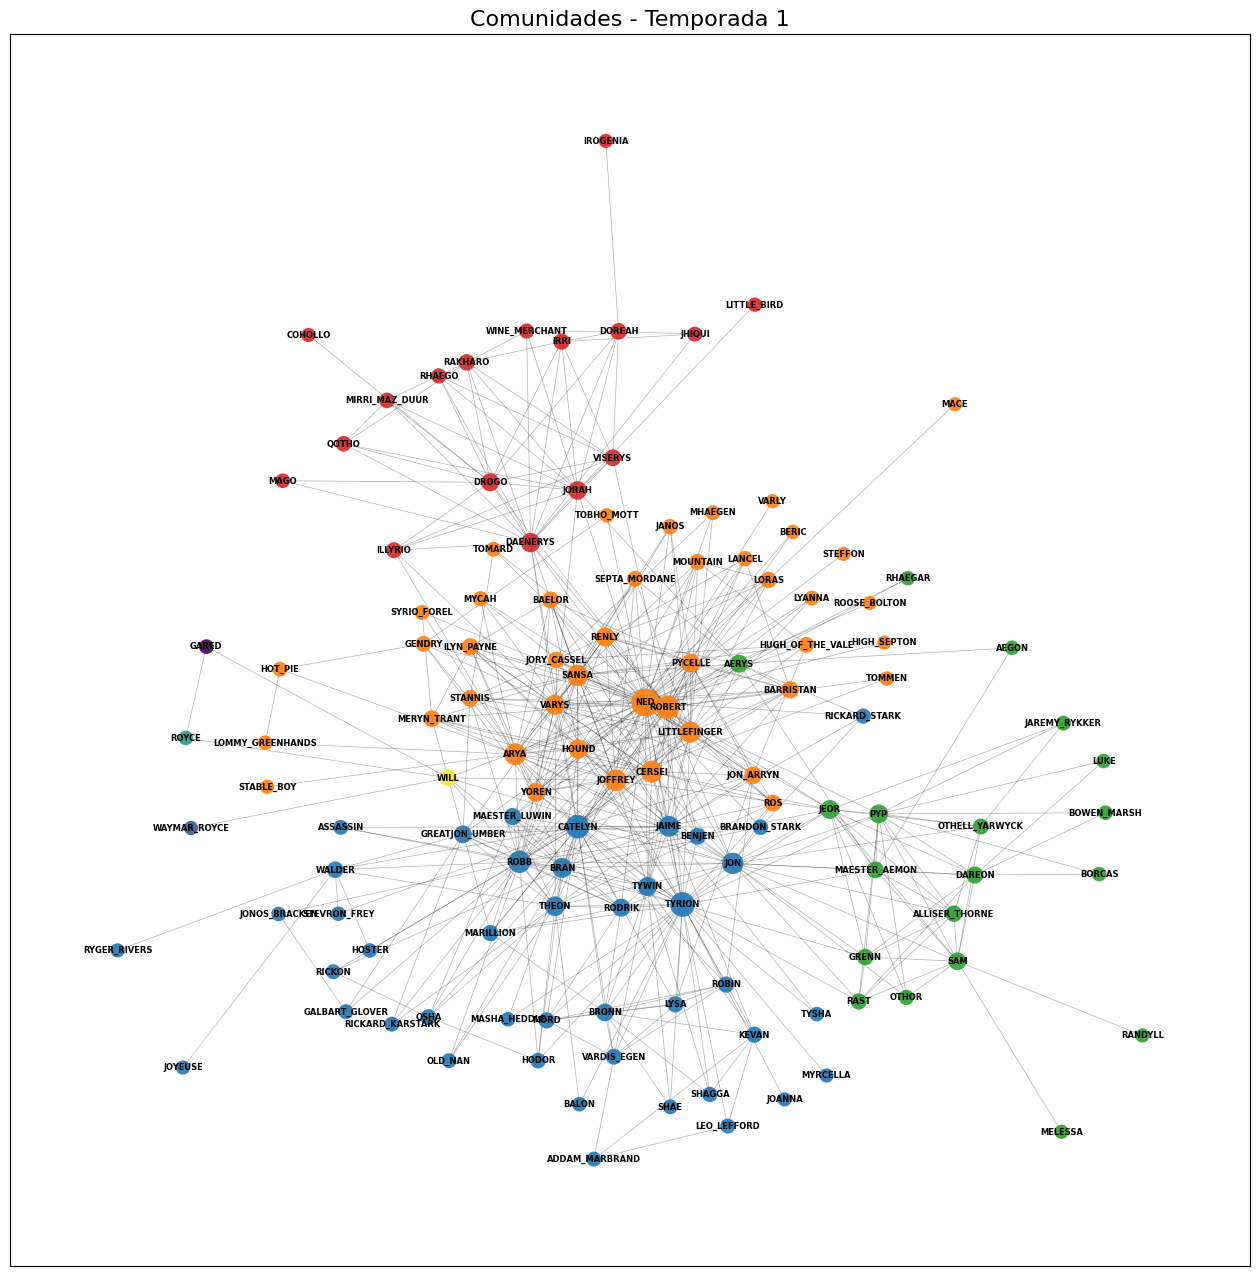
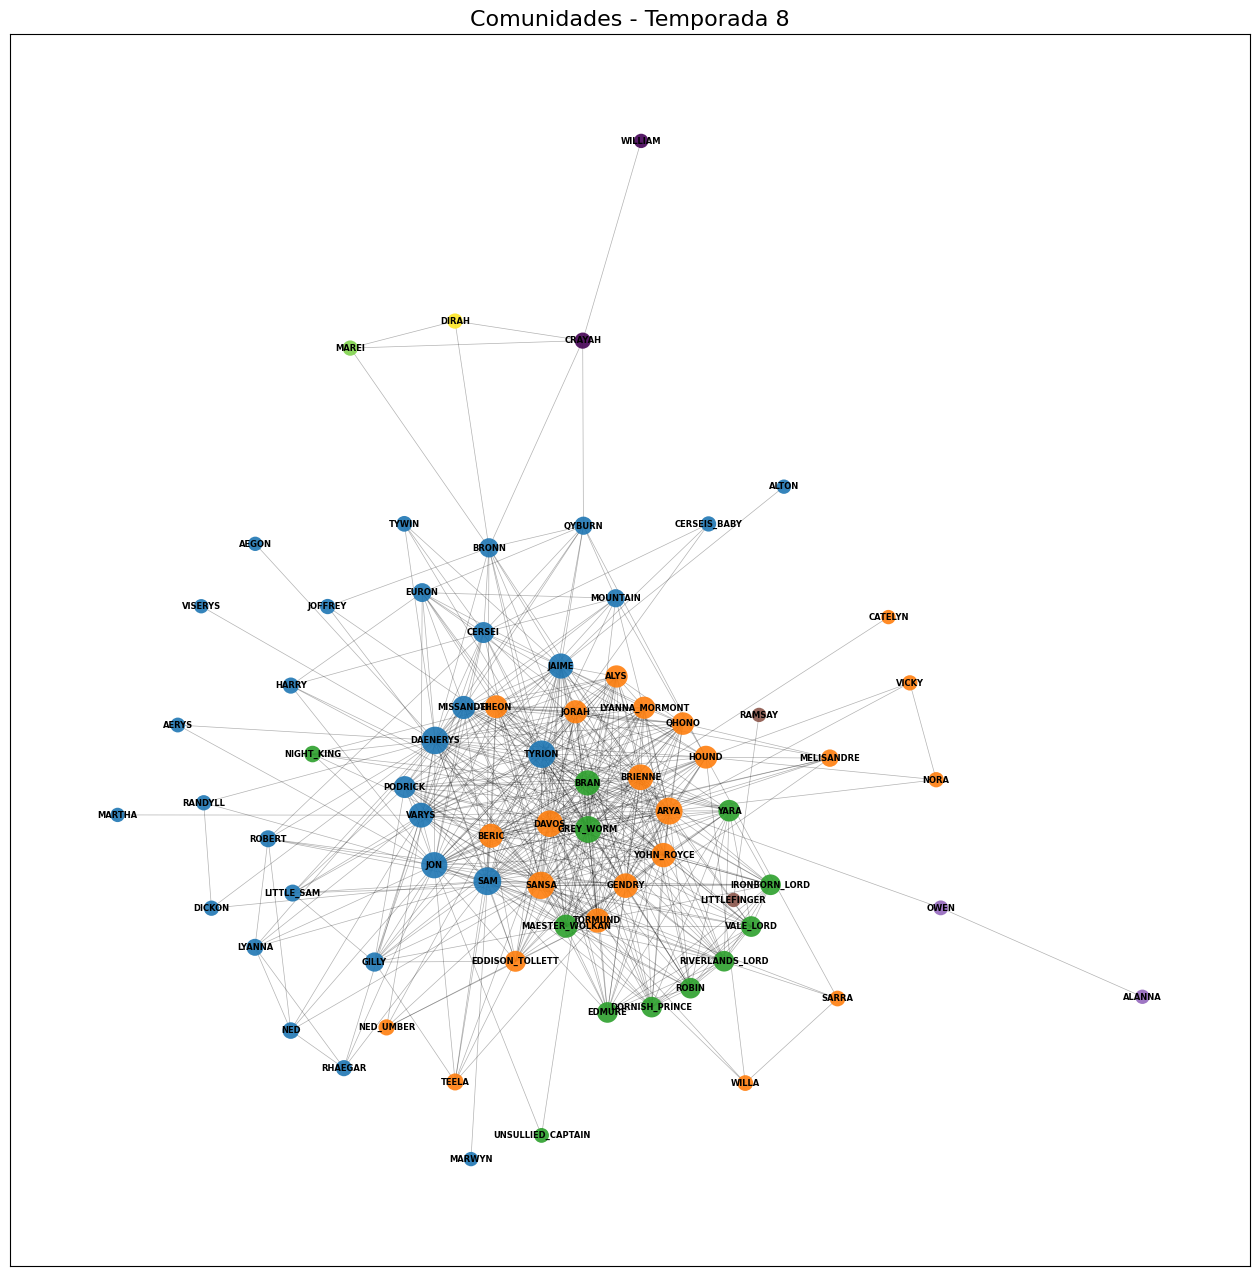

Na temporada 1 foram encontradas 7 comunidades, enquanto na temporada 8 foram encontradas 8 comunidades pelo mesmo algoritmo usado (Greedy Modularity Optimization).
Apesar de algumas similaridades entre alguns dos personagens de algumas comunidades em ambas as temporadas, não foi possível identificar uma comunidade em common entre as duas temporadas, dado que alguns personagens ao interagirem mais com outros personagens, acabam mudando de comunidades, além claro de alguns personagens se destacarem mais em uma temporada do que outra, as vezes tendo papel de protagonista em uma, e em outra estando mais como um personagem secundário.